<a href="https://colab.research.google.com/github/Lavanya0707/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Seoul Bike Sharing Demand Prediction**

## **Problem Description**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# **Attribute Information:**
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

**Importing Data From Google Drive**

In [9]:
## Importing Data From Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_loc = '/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv'
bike_data = pd.read_csv(data_loc,encoding='latin')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploring the Data**

In [10]:
# Check The First Five rows
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
# last five rows
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [14]:
# Check Total Number of rows and Columns in dataset.
print(f' The shape of dataset is ({(bike_data.shape[0])} x {(bike_data.shape[1])})\n Total Number of Rows are : {(bike_data.shape)[0]}\n Total Number of Columns are : {bike_data.shape[1]}')

 The shape of dataset is (8760 x 14)
 Total Number of Rows are : 8760
 Total Number of Columns are : 14


In [15]:
# List of all columns in Dataset
pd.DataFrame(bike_data.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [16]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [17]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [18]:
## Find the missing value, show the total null values for each column and sort it in descending order
bike_data.isnull().sum().sort_values(ascending=False)[:10] 

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
dtype: int64

Text(0.5, 1.0, 'HeatMap Shows Ratio of Missing Value')

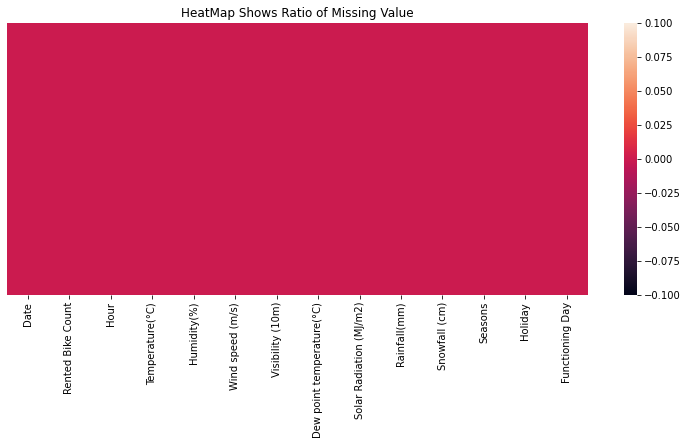

In [19]:
# Visulaizing the null values.
plt.figure(figsize=(13,5))
sns.heatmap(bike_data.isnull(),yticklabels=False)
plt.title("HeatMap Shows Ratio of Missing Value")

In [20]:
#print the unique value
pd.DataFrame(bike_data.nunique()).T

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,365,2166,24,546,90,65,1789,556,345,61,51,4,2,2


In [21]:
# Checking Duplicate Values
value= bike_data.duplicated().sum()
print("The Total number of duplicate values in the data set is =",value)

The Total number of duplicate values in the data set is = 0


**For Better Analysing we change the column name , Because variable having units with name**

In [22]:
bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)
new_column_name  = pd.DataFrame(bike_data.columns).T
new_column_name

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day


In [23]:
# Formating the date column 
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format = '%d/%m/%Y').dt.date
pd.DataFrame(bike_data['Date'][:5])

,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01


In [24]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_data['Date']=bike_data['Date'].astype('datetime64[ns]')
bike_data['year'] = bike_data['Date'].dt.year
bike_data['Month']=bike_data['Date'].dt.month
bike_data['Day']=bike_data['Date'].dt.day_name()

#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_data['Weekdays_or_weekend']=bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

# Now We can Drop Day , Year and Date columns
bike_df=bike_data.drop(columns=['Date','Day','year'],axis=1,inplace=True)
bike_data.head()  

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


**Count the value from seasons, holidays, Functioning day, Month & Weekdays_or_weekend**

In [25]:
pd.DataFrame(bike_data['Seasons'].value_counts()).T

,Spring,Summer,Autumn,Winter
Seasons,2208,2208,2184,2160


In [26]:
pd.DataFrame(bike_data['Holiday'].value_counts()).T

,No Holiday,Holiday
Holiday,8328,432


In [27]:
pd.DataFrame(bike_data['Functioning_Day'].value_counts()).T

,Yes,No
Functioning_Day,8465,295


In [28]:
pd.DataFrame(bike_data['Month'].value_counts()).T

,12,1,3,5,7,8,10,4,6,9,11,2
Month,744,744,744,744,744,744,744,720,720,720,720,672


**Data Visualization**


**Rented bikes Count By Month**

[Text(0.5, 1.0, 'Rented bikes Count By Month')]

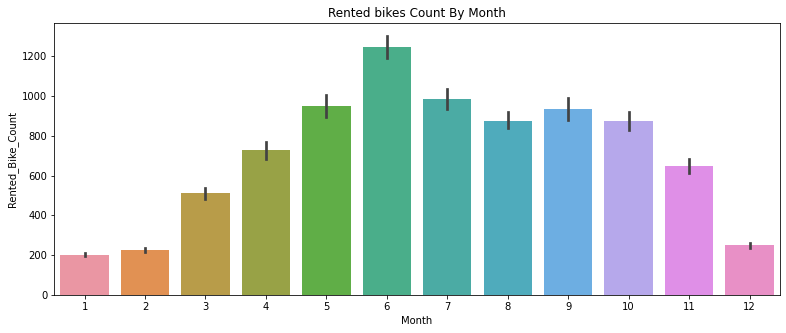

In [29]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Month',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count By Month')

**Rented bikes Count acording to Weekdays_or_weekend**

[Text(0.5, 1.0, 'Rented bikes Count acording to Weekdays_or_weekend')]

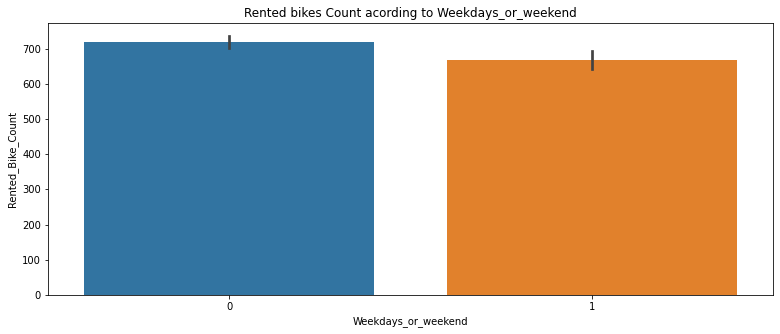

In [30]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Weekdays_or_weekend',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count acording to Weekdays_or_weekend')

**Rented bikes Count acording to Seasons**

[Text(0.5, 1.0, 'Rented bikes Count acording to Seasons')]

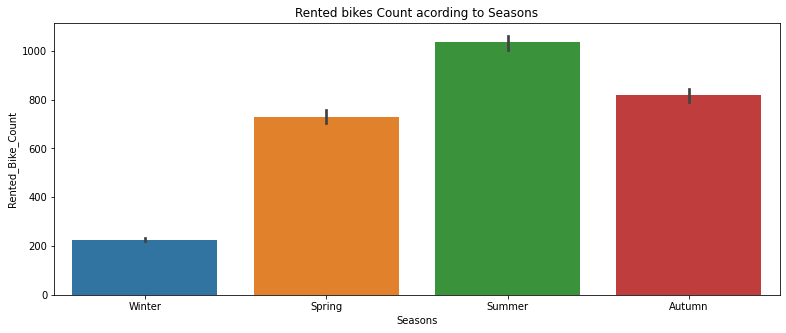

In [31]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Seasons',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count acording to Seasons')

**Rented bikes Count acording to Holidays**

[Text(0.5, 1.0, 'Rented bikes Count acording to Seasons')]

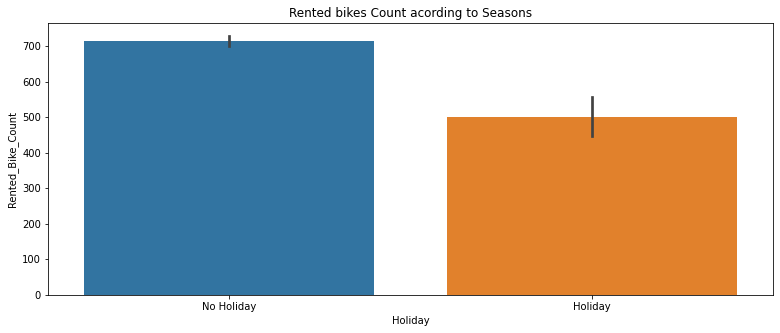

In [32]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Holiday',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count acording to Seasons')

**Rented bikes Count acording to Functioning Day**

[Text(0.5, 1.0, 'Rented bikes Count acording to Seasons')]

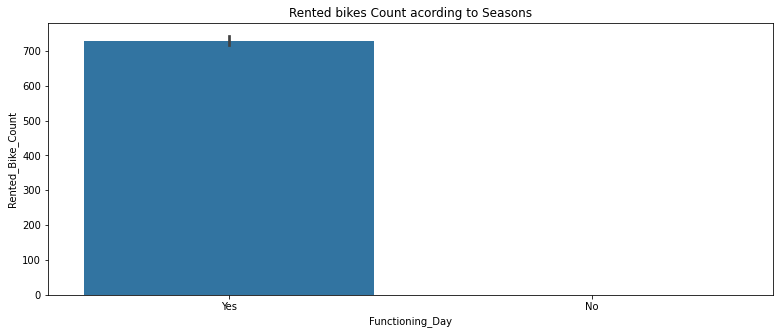

In [33]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Functioning_Day',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count acording to Seasons')

**Rented bikes Count acording to Hour**

[Text(0.5, 1.0, 'Rented bikes Count acording to Hour')]

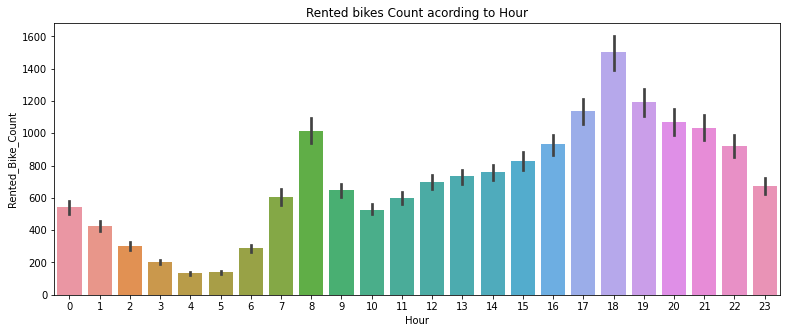

In [34]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=bike_data,x='Hour',y='Rented_Bike_Count')
ax.set(title='Rented bikes Count acording to Hour')

**Trend of Bike Rental according to Hour For Holiday / No Holiday**

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour For Holiday / No Holiday')

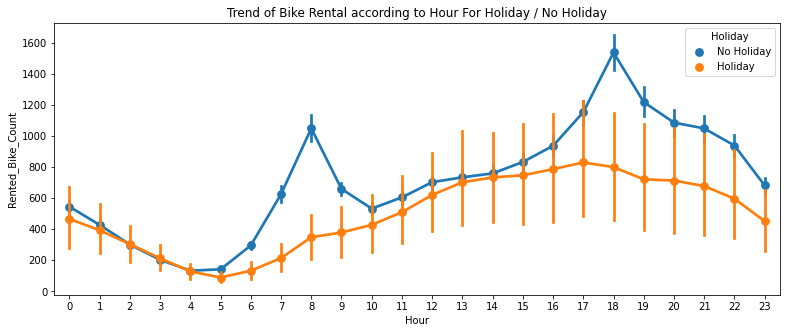

In [35]:
fig,ax=plt.subplots(figsize=(13,5))
sns.pointplot(data=bike_data, x='Hour',y='Rented_Bike_Count',hue='Holiday')
plt.title("Trend of Bike Rental according to Hour For Holiday / No Holiday")

**Trend of Bike Rental according to Hour on Functioning day**

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour on Functioning day')

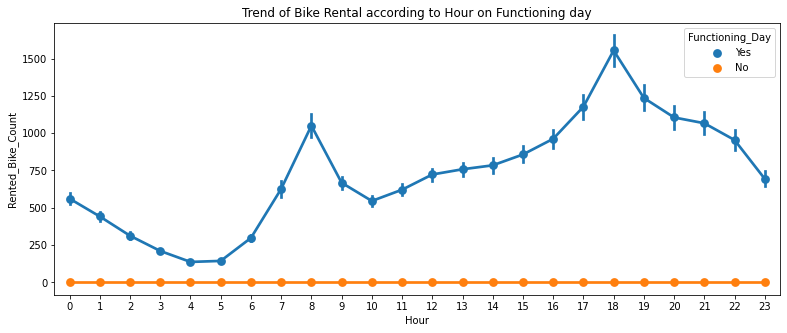

In [36]:
plt.figure(figsize=(13,5))
sns.pointplot(data=bike_data, x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')
plt.title("Trend of Bike Rental according to Hour on Functioning day")

**Count of Rented bikes acording to seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

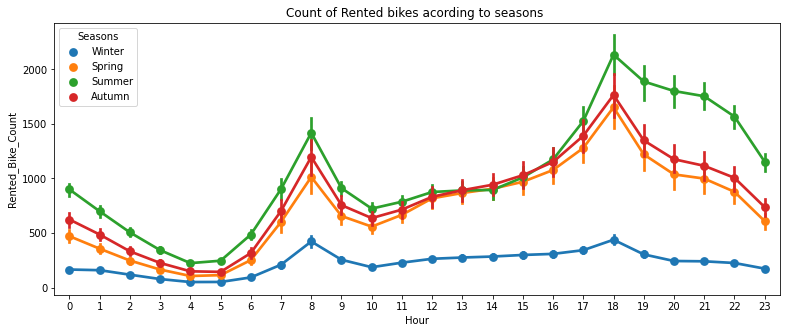

In [37]:
fig,ax=plt.subplots(figsize=(13,5))
sns.pointplot(data=bike_data,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**What is the trend of Bike Rental according to Hour in different months ?**

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour in different months')

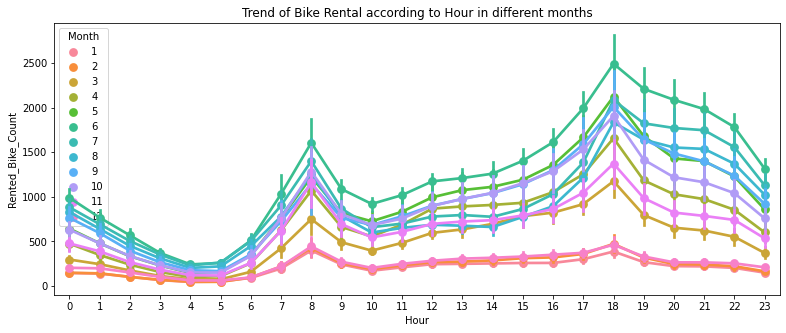

In [38]:
plt.figure(figsize=(13,5))
sns.pointplot(data=bike_data, x='Hour',y='Rented_Bike_Count',hue='Month')
plt.title("Trend of Bike Rental according to Hour in different months")

**what is the trend of Bike Rental according to Hour in Weekdays_or_weekend ?**

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour in Weekdays_or_weekend.')

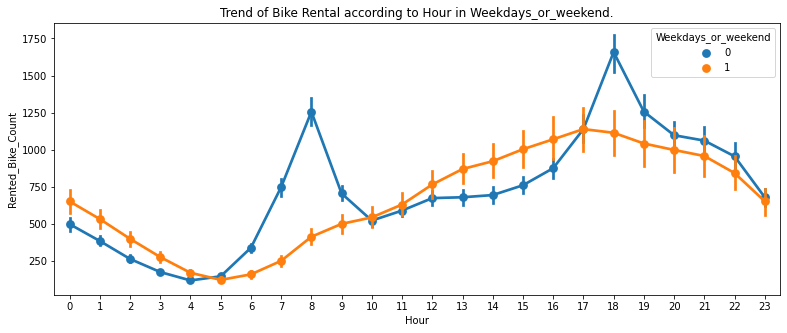

In [39]:
plt.figure(figsize=(13,5))
sns.pointplot(data=bike_data, x='Hour',y='Rented_Bike_Count',hue='Weekdays_or_weekend')
plt.title("Trend of Bike Rental according to Hour in Weekdays_or_weekend.")

**Check the distribution of target variables - "Bike Rented Count"**

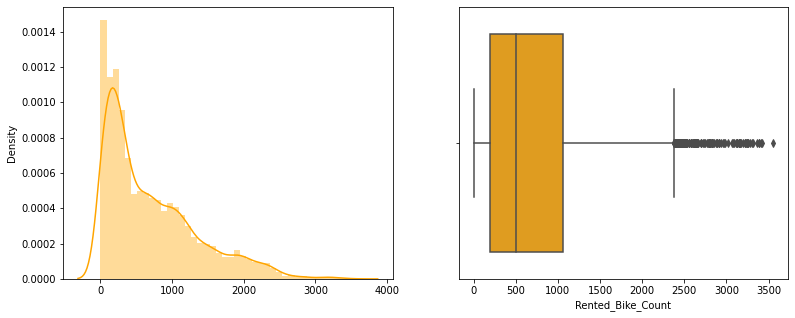

In [40]:
f, axes = plt.subplots(1, 2,figsize=(13,5)) 
sns.distplot(x=bike_data['Rented_Bike_Count'],color='orange',ax=axes[0])
sns.boxplot(x=bike_data['Rented_Bike_Count'],color='orange',ax=axes[1])

**By Using Squre Root Method we Normalize our target variable**

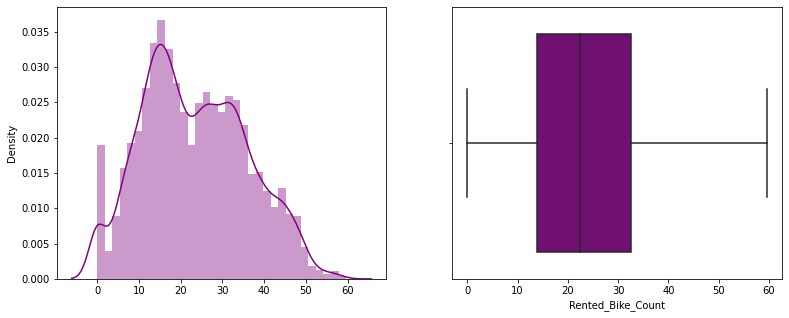

In [41]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.distplot(x=np.sqrt(bike_data['Rented_Bike_Count']),color='purple',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_data['Rented_Bike_Count']),color='purple',ax=axes[1])

Here by using square root method we normalized our dependent variable and we can see there are no outliers present.

**Now we check distribution of independent variables using Histogram where mean and medians are lying in the distribution and the data points in variables are distributed.**

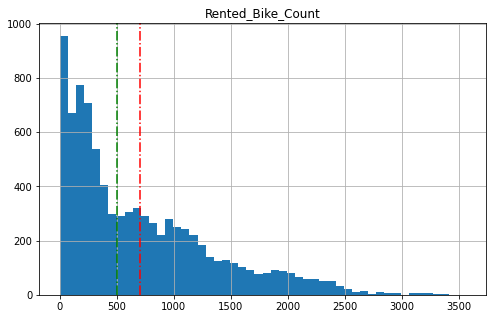

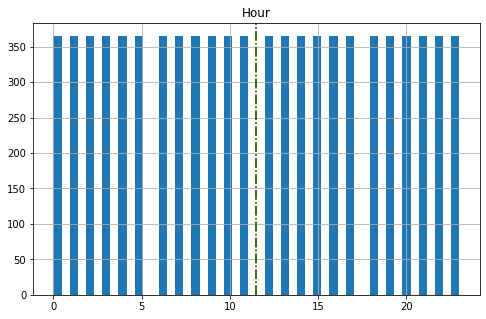

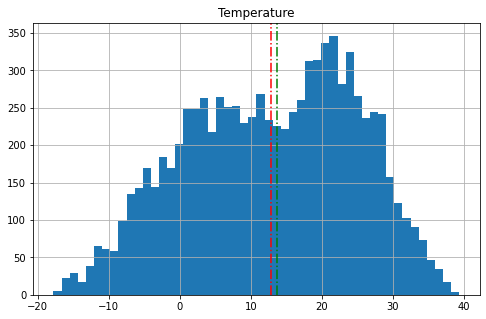

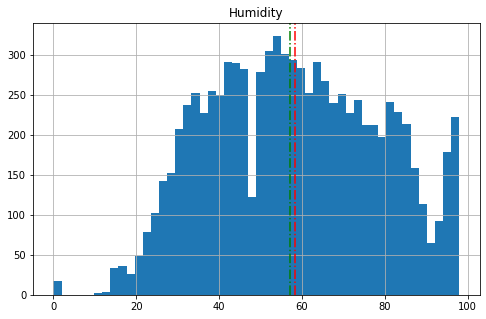

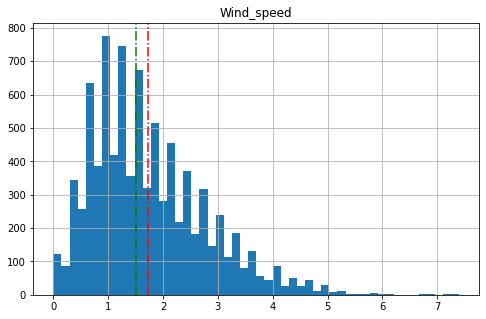

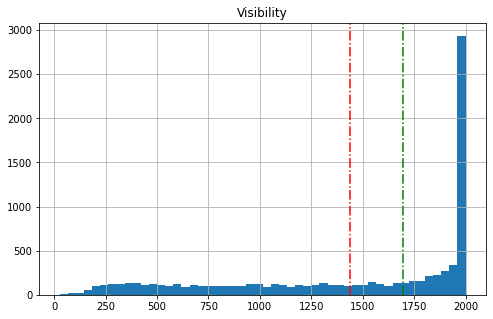

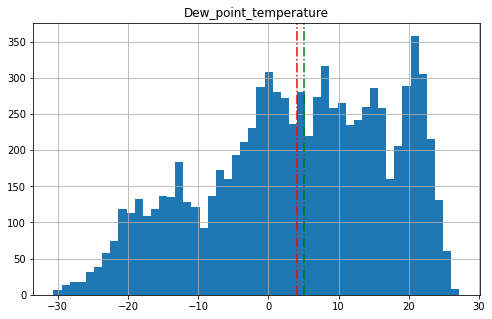

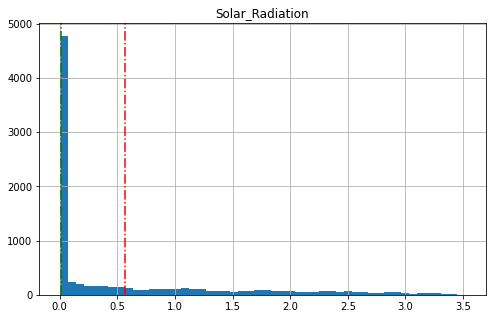

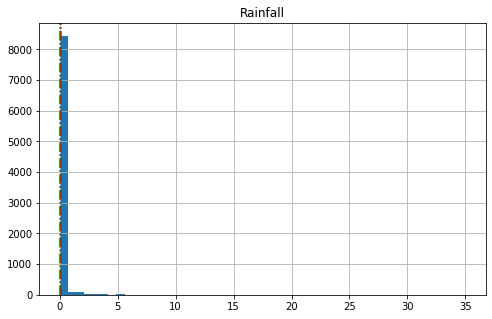

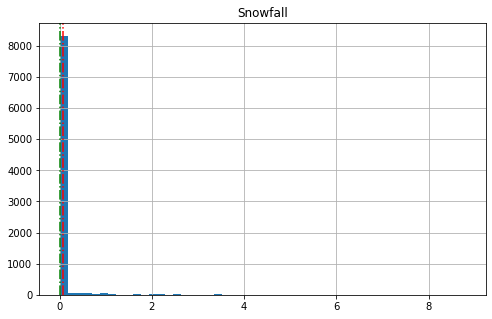

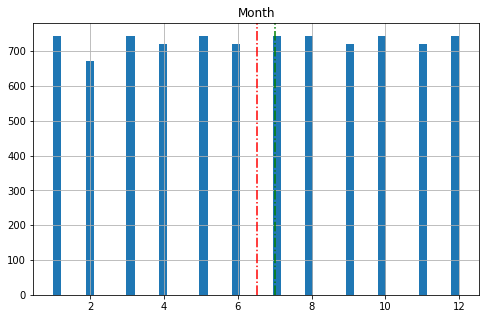

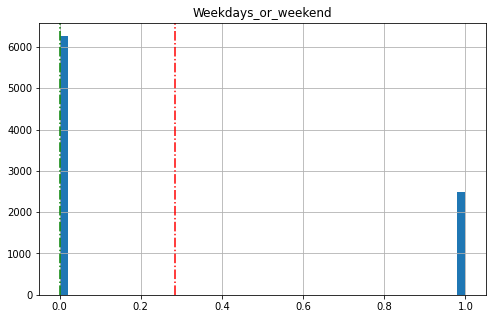

In [42]:
numeric_col=bike_data.describe().columns.tolist()
for col in numeric_col:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(),color='red',linestyle='dashdot' )
    ax.axvline(feature.median(),color='green',linestyle='dashdot')    
    ax.set_title(col)
plt.show()

**Normalizing The variables using squre root method.**

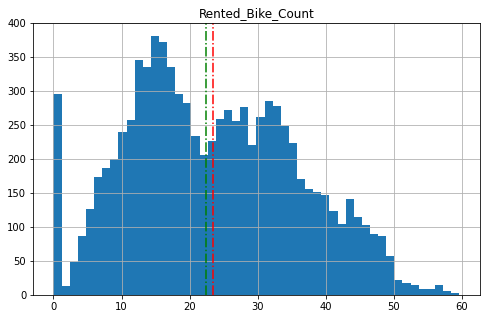

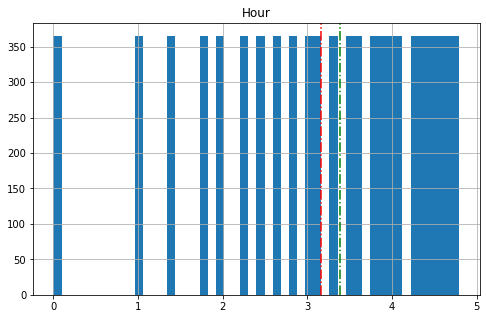

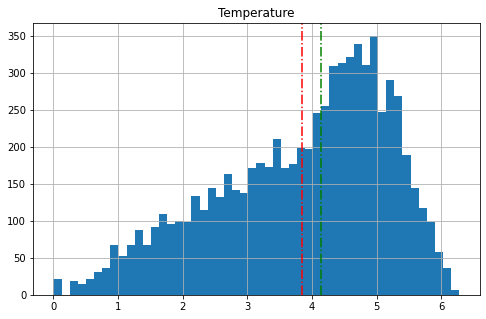

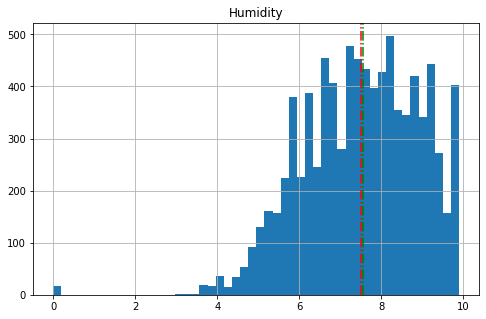

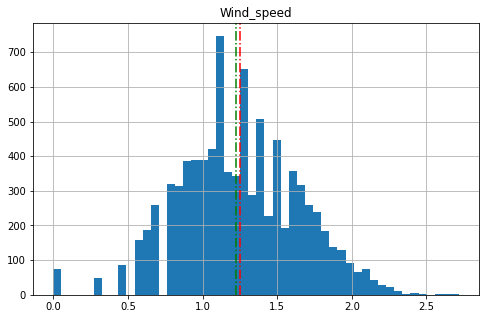

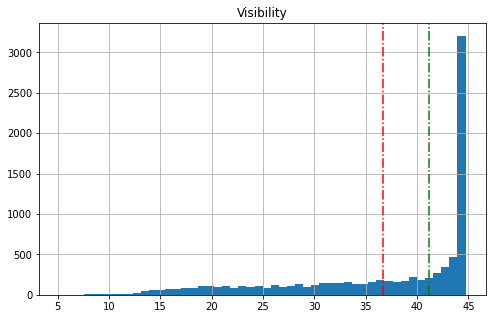

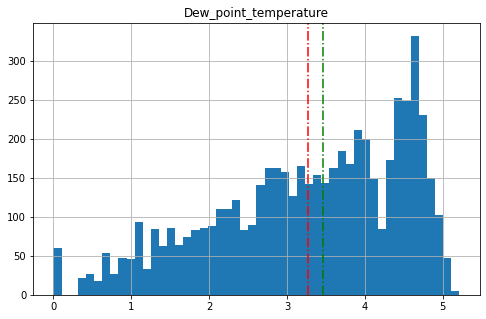

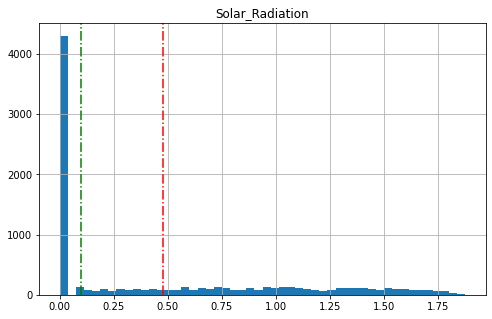

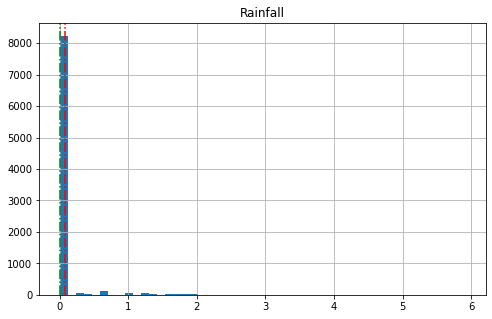

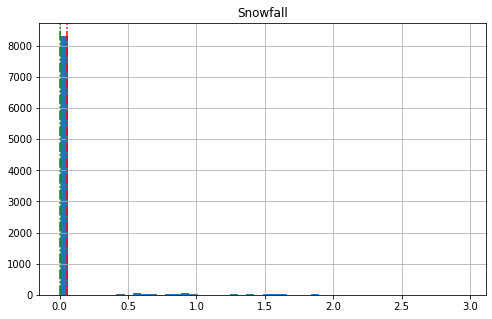

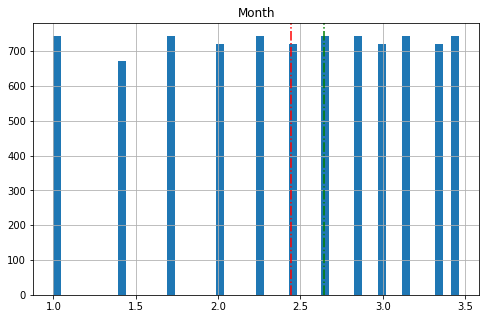

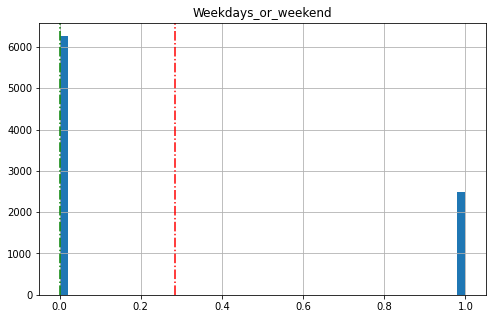

In [43]:
for col in numeric_col:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = np.sqrt(bike_data[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashdot')
    ax.axvline(feature.median(), color='green', linestyle='dashdot')    
    ax.set_title(col)
plt.show()

**Now we check the relationship between the independent variable of remaining columns and dependent variable of "Rented Bike Count"**

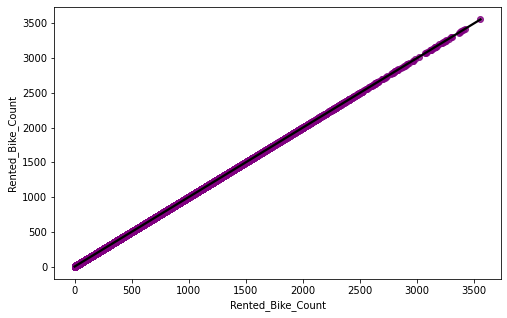

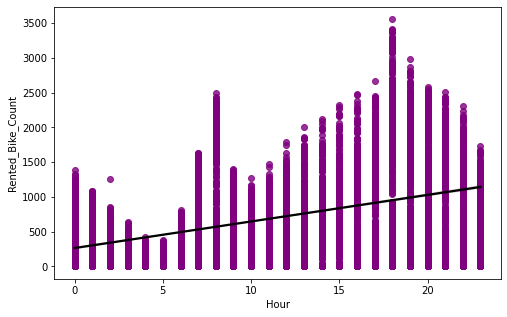

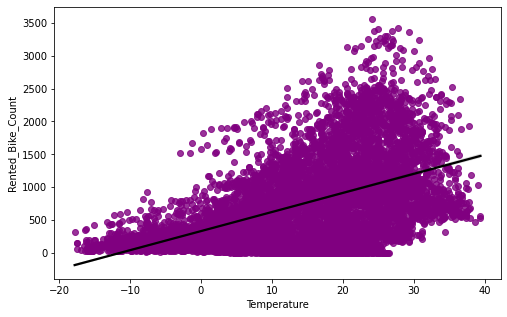

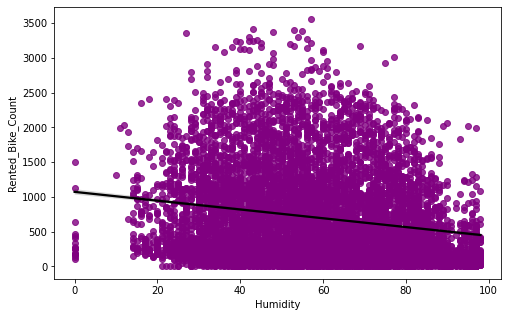

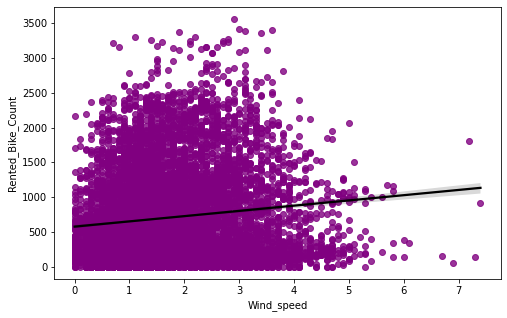

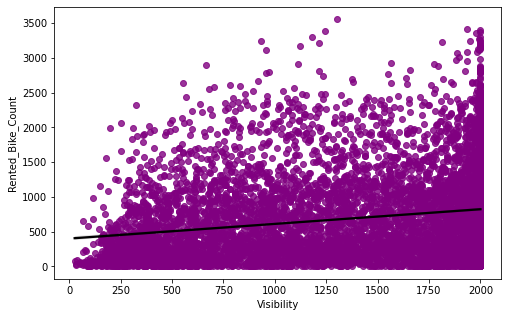

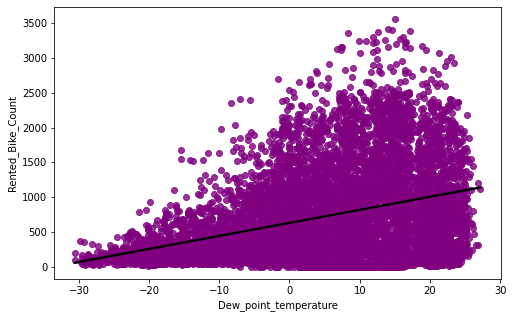

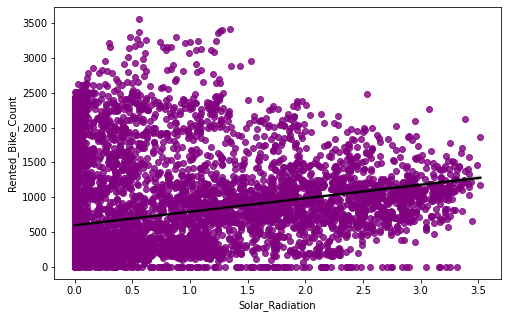

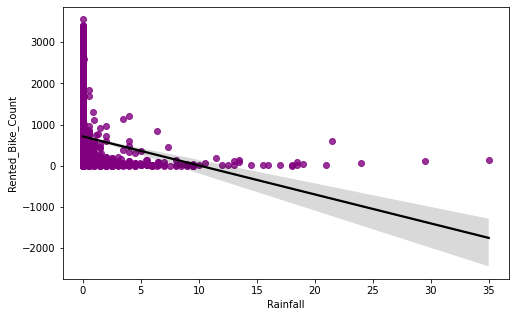

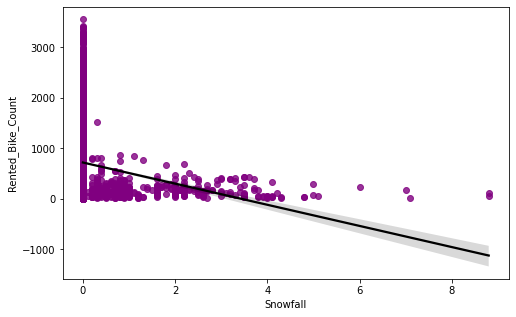

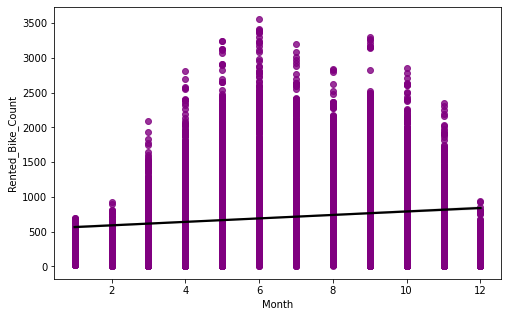

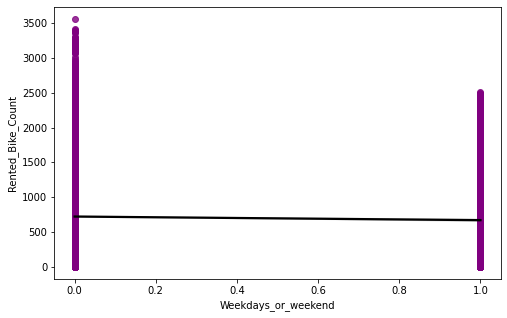

In [44]:
for col in numeric_col:
  plt.figure(figsize=(8,5))
  ax=fig.gca()
  sns.regplot(x=bike_data[col],y=bike_data['Rented_Bike_Count'],scatter_kws={'color':'purple'},line_kws={'color':'black'})

**Corelation between dependent and independent variable.**

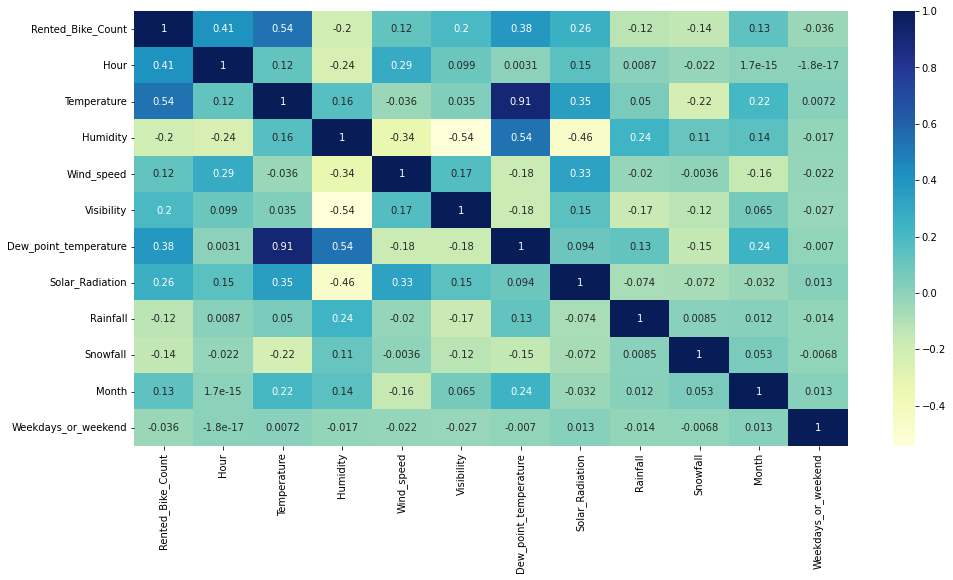

In [45]:
plt.figure(figsize=(16,8))
corr=bike_data.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

**Making a copy of data for modeling**

In [46]:
copy_data = bike_data.copy() 
copy_data.head(3)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [47]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    copy_data = one_hot_encoding(copy_data, col)
copy_data.head()  

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


In [48]:
#Assign the value in X and Y
x = copy_data.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(copy_data['Rented_Bike_Count'])

In [49]:
x.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


In [50]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [51]:
#Creat test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 16)
(2190, 16)


**Now we Start Model Buliding For**

LINEAR REGRESSION

LASSO REGRESSION

RIDGE REGRESSION

ELASTIC NET REGRESSION

DECISION TREES REGRESSOR

RANDOM FOREST REGRESSOR

GRADIENT BOOSTED REGRESSOR

GRADIENT BOOSTING REGRESSOR WITH GRIDSEARCHCV

In [52]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

**LINEAR REGRESSION**

In [53]:
#check the score
reg.score(x_train, y_train)

0.6552975724025564

In [54]:
#check the coefficeint
reg.coef_

array([ 4.91862812e-01,  7.15726462e-02, -2.74811432e-01,  1.05344923e-01,
        6.29815610e-05,  4.41650545e-01, -6.74618592e-01, -1.42448920e+00,
        1.17833245e-01,  1.59336971e-01, -1.42269511e+00, -1.83487376e+00,
       -2.67562684e+00, -7.09395166e+00,  3.12260510e+00,  2.86264115e+01])

In [55]:
#get the X_train and X-test value
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [56]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 53.080960809327934
RMSE : 7.28566817864552
MAE : 5.586424669493191
R2 : 0.6552975724025564
Adjusted R2 : 0.6527594965435785


In [57]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [58]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)
    
#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 52.84573767539748
RMSE : 7.269507388771091
MAE : 5.608326408788622
R2 : 0.6654621707125412
Adjusted R2 : 0.6629989377311334


In [59]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

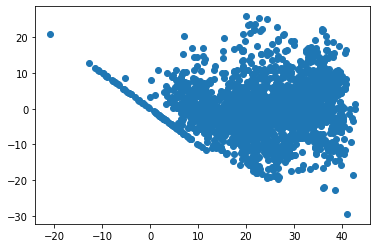

In [60]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

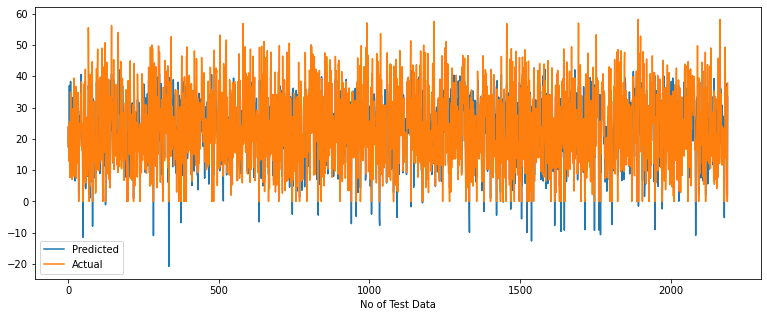

In [61]:
#Plot the figure
plt.figure(figsize=(13,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Lasso Regession**

In [62]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(x_train, y_train)
# Create the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))

0.45281538394695453 0.47701176077074947


In [63]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 80.53531396270661
RMSE : 8.974146976883464
MAE : 6.659731166521835
R2 : 0.47701176077074947
Adjusted R2 : 0.4731609499894941


In [65]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [66]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 86.43678576363727
RMSE : 9.297138579349953
MAE : 6.8652938771568115
R2 : 0.45281538394695453
Adjusted R2 : 0.44878641300500854


In [67]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

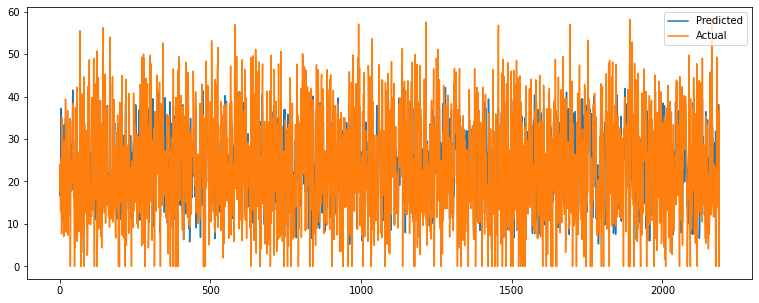

In [68]:
#Plot the figure
plt.figure(figsize=(13,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

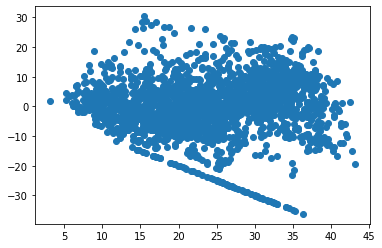

In [69]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

**RIDGE REGRESSION**

In [70]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [71]:
#FIT THE MODEL
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [72]:
#check the score
ridge.score(x_train, y_train)

0.6552975230341327

In [73]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [74]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 53.08096841160499
RMSE : 7.2856687003737
MAE : 5.586440416080089
R2 : 0.6552975230341327
Adjusted R2 : 0.6527594468116504


In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [76]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 52.84593221813509
RMSE : 7.269520769496094
MAE : 5.608416221410825
R2 : 0.6654609391675197
Adjusted R2 : 0.662997697118132


In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

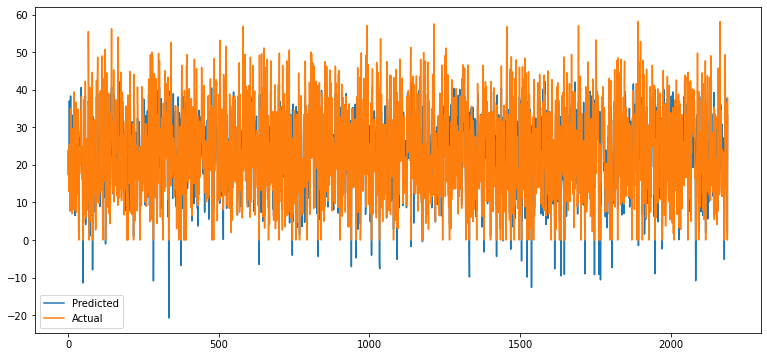

In [78]:
#Plot the figure
plt.figure(figsize=(13,6))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

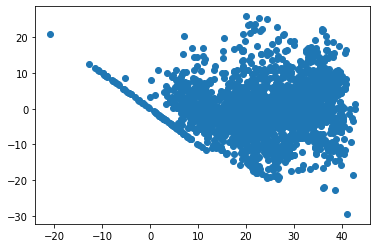

In [79]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

**ELASTIC NET REGRESSION**

In [80]:
#import the packages
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [81]:
#FIT THE MODEL
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [82]:
#check the score
elasticnet.score(x_train, y_train)

0.5835423019221027

In [83]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [84]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 64.13060361800518
RMSE : 8.008158565987888
MAE : 6.071434726026881
R2 : 0.5835423019221027
Adjusted R2 : 0.5804758853692972


In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [86]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 66.72858042048135
RMSE : 8.168756357027755
MAE : 6.19587851787155
R2 : 0.5775773898280898
Adjusted R2 : 0.5744670530757886


In [87]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

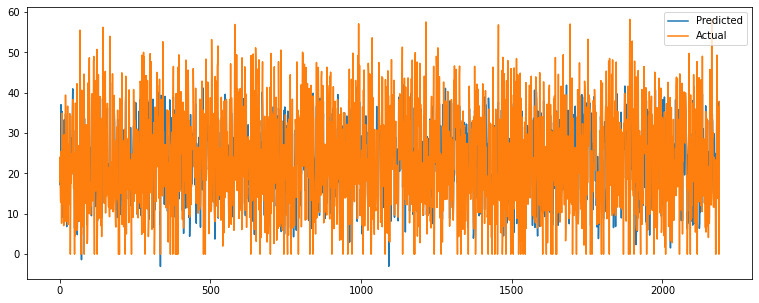

In [88]:
#Plot the figure
plt.figure(figsize=(13,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

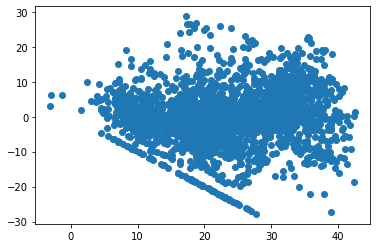

In [89]:
# Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

**DECISION TREE REGRESSOR**

In [90]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [91]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(x_train)
y_pred_test_d = decision_regressor.predict(x_test)

In [92]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.8542435129837062
MSE : 22.44514037496899
RMSE : 4.737630248865881
MAE : 3.4063408645454785
R2 : 0.8542435129837062
Adjusted R2 : 0.8531702944874978


In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 26.427619550791775
RMSE : 5.14078005275384
MAE : 3.6405844945927885
R2 : 0.8327010111569951
Adjusted R2 : 0.8314691732271801


In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

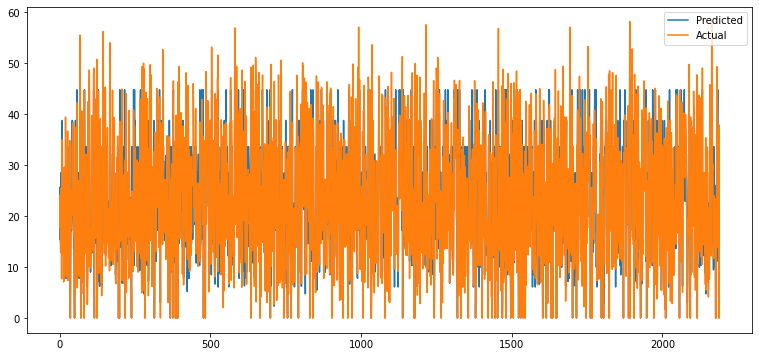

In [96]:
#Plot the figure
plt.figure(figsize=(13,6))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

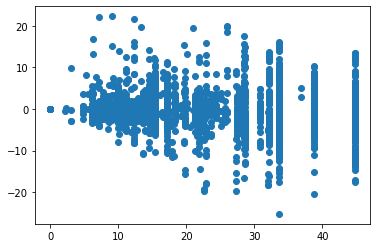

In [97]:
# Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

**RANDOM FOREST REGRESSOR**

In [98]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(x_train)
y_pred_test_r = rf_model.predict(x_test)

In [100]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(x_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9913406659551068
MSE : 1.3334567275187335
RMSE : 1.1547539683927193
MAE : 0.7213714725681177
R2 : 0.9913406659551068
Adjusted R2 : 0.9912769064775558


In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [102]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 9.768892087482458
RMSE : 3.125522690284372
MAE : 1.9899658704177534
R2 : 0.9381584192548555
Adjusted R2 : 0.937703073975554


In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

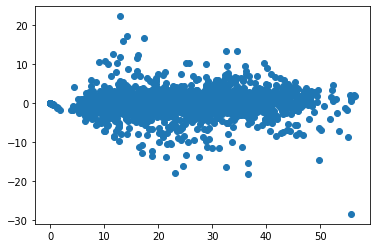

In [104]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [105]:
rf_model.feature_importances_

array([0.23934635, 0.2732345 , 0.10689742, 0.00945793, 0.01018936,
       0.01761908, 0.0389372 , 0.05620798, 0.00156953, 0.01805034,
       0.02060348, 0.00179148, 0.00113395, 0.04992808, 0.0043929 ,
       0.15064042])

In [106]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [107]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [108]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.27
0,Hour,0.24
15,Functioning_Day_Yes,0.15
2,Humidity,0.11
7,Rainfall,0.06
13,Seasons_Winter,0.05
6,Solar_Radiation,0.04
5,Dew_point_temperature,0.02
9,Month,0.02
10,Weekdays_or_weekend,0.02


In [109]:
#FIT THE MODEL
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
features = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

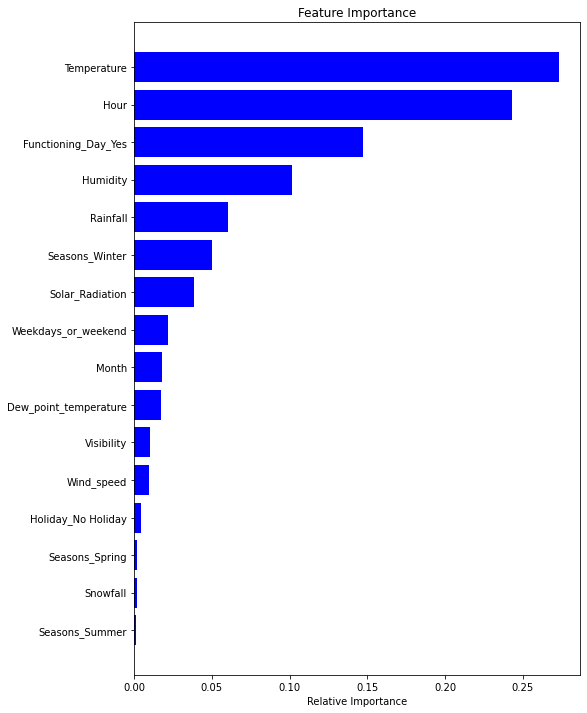

In [111]:
#Plot the figure
plt.figure(figsize=(8,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**GRADIENT BOOSTED REGRESSOR**

In [112]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [113]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(x_train)
y_pred_test_g = gb_model.predict(x_test)

In [114]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(x_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9001696544113085
MSE : 15.37294268192237
RMSE : 3.92083443694354
MAE : 2.8013746972643117
R2 : 0.9001696544113085
Adjusted R2 : 0.8994345943425468


In [115]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [116]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 17.588973973146366
RMSE : 4.193921073786006
MAE : 2.9913837270151165
R2 : 0.8886537035680477
Adjusted R2 : 0.887833850488015


In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

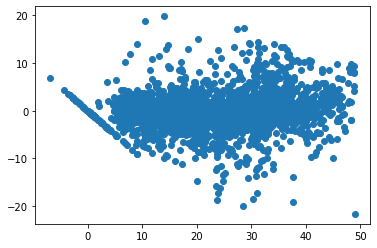

In [119]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [120]:
gb_model.feature_importances_

array([2.48003129e-01, 2.90893953e-01, 1.04480791e-01, 2.69240661e-04,
       5.38014791e-04, 9.18980557e-03, 3.06405486e-02, 6.28806832e-02,
       7.33956719e-04, 2.19048139e-02, 9.04137710e-03, 8.50916053e-05,
       1.17234930e-04, 5.19401128e-02, 2.58666972e-03, 1.66694578e-01])

In [121]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [122]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [123]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.25
1,Temperature,0.29
2,Humidity,0.10
3,Wind_speed,0.00
4,Visibility,0.00


In [124]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.29
0,Hour,0.25
15,Functioning_Day_Yes,0.17
2,Humidity,0.10
7,Rainfall,0.06
13,Seasons_Winter,0.05
6,Solar_Radiation,0.03
9,Month,0.02
5,Dew_point_temperature,0.01
10,Weekdays_or_weekend,0.01


In [125]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [126]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

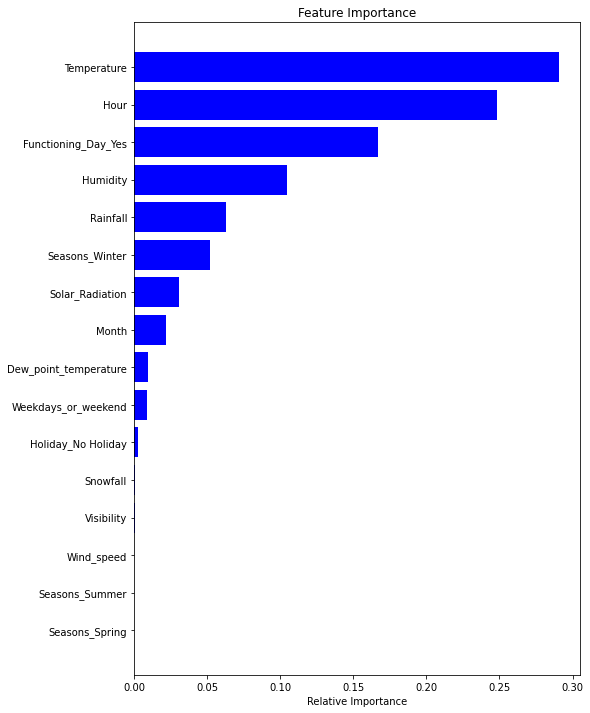

In [127]:
#Plot the figure
plt.figure(figsize=(8,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**GRADIENT BOOSTING REGRESSOR WITH GRIDSEARCHCV**

In [128]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [129]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [130]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [131]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [132]:
gb_optimal_model = gb_grid.best_estimator_

In [133]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [134]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(x_train)
y_pred_g_g= gb_optimal_model.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9688779196560818
MSE : 4.792510277791052
RMSE : 2.189180275306502
MAE : 1.421909456944972
R2 : 0.9688779196560818
Adjusted R2 : 0.9686487648997529


In [136]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [137]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 8.999159624968756
RMSE : 2.999859934225056
MAE : 1.951219472831746
R2 : 0.9430311798306117
Adjusted R2 : 0.9426117131381542


In [138]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

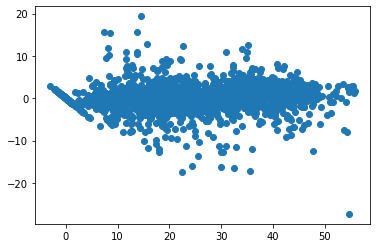

In [139]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [140]:
gb_optimal_model.feature_importances_

array([2.57153939e-01, 2.72057593e-01, 1.12513377e-01, 2.33999418e-03,
       4.23094080e-03, 1.27467821e-02, 2.68143174e-02, 6.06924363e-02,
       1.30241565e-03, 1.96637719e-02, 2.41692557e-02, 2.31549530e-04,
       1.11278188e-03, 5.53452257e-02, 2.75634605e-03, 1.46869274e-01])

In [141]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [142]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [143]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.26
1,Temperature,0.27
2,Humidity,0.11
3,Wind_speed,0.00
4,Visibility,0.00


In [144]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.27
0,Hour,0.26
15,Functioning_Day_Yes,0.15
2,Humidity,0.11
7,Rainfall,0.06
13,Seasons_Winter,0.06
6,Solar_Radiation,0.03
9,Month,0.02
10,Weekdays_or_weekend,0.02
5,Dew_point_temperature,0.01


In [145]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [146]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

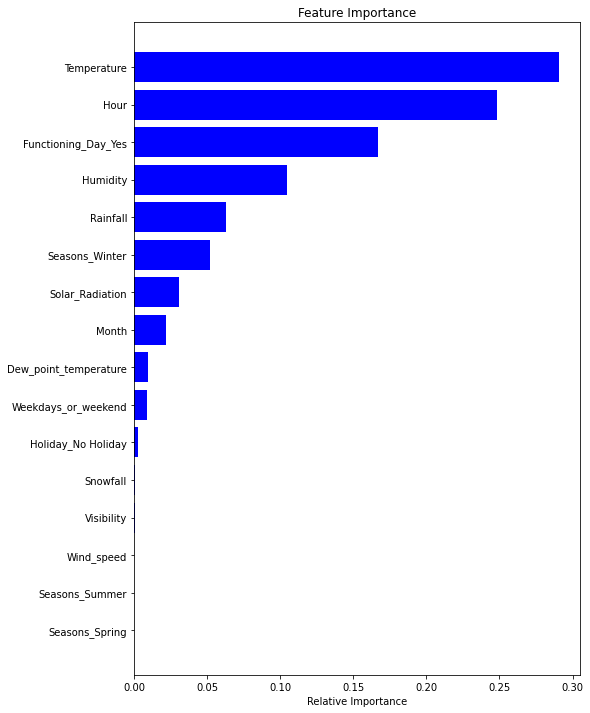

In [147]:
#Plot the figure
plt.figure(figsize=(8,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Conclusion**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are: **bold text**

In [148]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.586  53.081  7.286   
             1                Lasso regression   6.660  80.535  8.974   
             2                Ridge regression   5.586  53.081  7.286   
             3          Elastic net regression   6.071  64.131  8.008   
             4        Dicision tree regression   3.406  22.445  4.738   
             5        Random forest regression   0.721   1.333  1.155   
             6    Gradient boosting regression   2.801  15.373  3.921   
             7  Gradient Boosting gridsearchcv   1.422   4.793  2.189   
Test set     0               Linear regression   5.608  52.846  7.270   
             1                Lasso regression   6.865  86.437  9.297   
             2                Ridge regression   5.608  52.846  7.270   
             3      Elastic net regression Test  6.196  66.729  8.169   
             4        Dicision tree regression   3.641  26.428  5.141   
             5        Random forest regression   1.990   9.769  3.126   
             6    Gradient boosting regression   2.991  17.589  4.194   
             7  Gradient Boosting gridsearchcv   1.951   8.999  3.000   

                R2_score  Adjusted R2  
Training set 0     0.655         0.65  
             1     0.477         0.47  
             2     0.655         0.65  
             3     0.584         0.58  
             4     0.854         0.85  
             5     0.991         0.99  
             6     0.900         0.90  
             7     0.969         0.97  
Test set     0     0.665         0.66  
             1     0.453         0.45  
             2     0.665         0.66  
             3     0.578         0.57  
             4     0.833         0.83  
             5     0.938         0.94  
             6     0.889         0.89  
             7     0.943         0.94

• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model. **bold text**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.